# Detección de líneas

## Operador de Sobel
https://es.wikipedia.org/wiki/Operador_Sobel

$$ G_x = \begin{bmatrix}-1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   \text{     y     }    G_y = \begin{bmatrix}-1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

$$ G = \sqrt{G_x^2 + G_y^2} $$

In [ ]:
import cv2
import numpy as np
 
#Capture livestream video content from camera 0
#cap = cv2.VideoCapture(1)
cap = cv2.VideoCapture("carretera.mp4")
 
while(1):
 
    # Take each frame
    retVal , frame = cap.read()    
    if not retVal:
        break
        
    frame = cv2.resize(frame, (400, 300))
     
    # Convert to grey for simpler calculations
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    # Calculation of Sobelx
    sobel = cv2.Sobel(frame,cv2.CV_8U,1,1,ksize=3)
    # sobel = cv2.Sobel(frame,cv2.CV_8U,1,1,ksize=5)
    # sobel = cv2.Sobel(frame,cv2.CV_8U,1,1,ksize=7)
     
    cv2.imshow('original',frame) 
    cv2.imshow('sobel',sobel)
    
    #key = cv2.waitKey(5) 
    #if key == cv2.KEY_ESC:
    #    break
    
    # Wait for Esc key to stop
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
 
cv2.destroyAllWindows()
 
#release the frame
cap.release()

Podemos apreciar algunos problemas con el operador de Sobel debido a que genera señal en cualquier zona donde haya un mínimo de gradiente (figura de abajo). Nos interesa tener un detector que nos proporcione únicamente el gradiente allí donde éste sea destacado e importante. Para ello, contamos con el detector de bordes de Canny.

<img src="Sobel_result01.jpg" width="50%">

## Detector de bordes de Canny
https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

In [2]:
# OpenCV program to perform Edge detection in real time
# import libraries of python OpenCV
# where its functionality resides
import cv2

# np is an alias pointing to numpy library
import numpy as np

# capture frames from a camera
cap = cv2.VideoCapture("carretera.mp4")
# cap = cv2.VideoCapture(1)


# loop runs if capturing has been initialized
while(1):
	# reads frames from a camera
    retVal,frame = cap.read()
    if not retVal:
        break
   
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	# Display an original image
    cv2.imshow('Original',frame)

	# finds edges in the input image and
	# marks them in the output map edges
    edges = cv2.Canny(frame,100,200)

	# Display edges in a frame
    cv2.imshow('Edges',edges)

	# Wait for Esc key to stop
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break


# Close the window
cap.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()


## Detector de líneas de Hough
https://learnopencv.com/hough-transform-with-opencv-c-python/
https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb

True

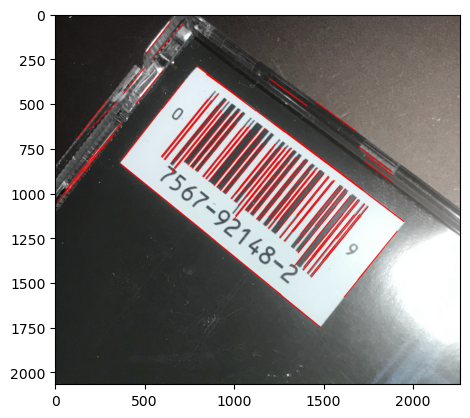

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image 
#img = cv2.imread('barcode02.png', cv2.IMREAD_COLOR    )
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)

# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
#plt.imshow(edges, cmap='gray')

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=150, maxLineGap=10)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Show result
plt.imshow(img)
cv2.imwrite('barcode03_lines.png', img)

Si quisiéramos rotar la imagen para dejar las líneas del código de barras completamente verticales u horizontales, deberíamos calcular cuál es la pendiente o ángulo de inclinación de las líneas. Para ello, vamos a extraer la media de todas las pendientes y, luego, dado que asumimos que la mayoría de líneas extraídas van a corresponder con el código de barras, extraeremos la media de las pendientes más parecidas a la media.

In [6]:
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)

# Extract mean slope of lines
slopes = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    slopes.append((y2-y1)/(x2-x1))

mean_slope = np.mean(slopes)

# Convert to degrees
mean_angle = np.rad2deg(np.arctan(mean_slope))
print("Ángulo promedio total: ", mean_angle)
 
# Extract only lines with slope within 10 degrees of the mean
filtered_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2-y1)/(x2-x1)
    angle = np.rad2deg(np.arctan(slope))
    if abs(angle - mean_angle) < 10:
        filtered_lines.append(line)

# Extract mean slope of filtered lines
slopes = []
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    slopes.append((y2-y1)/(x2-x1))
mean_slope = np.mean(slopes)

# Convert to degrees
mean_angle = np.rad2deg(np.arctan(mean_slope))
print("Ángulo promedio de las líneas del código de barras: ", mean_angle)




Ángulo promedio total:  -42.487866443703034
Ángulo promedio de las líneas del código de barras:  -50.99409403516252


## Rotar imágenes

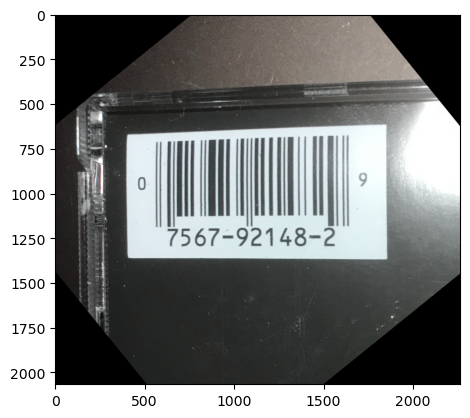

In [7]:
# Rotate image
img = cv2.imread('barcode03.png', cv2.IMREAD_COLOR)
rows, cols, _ = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), -50.99 +90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst)


## Algoritmo del detector de líneas de Hough

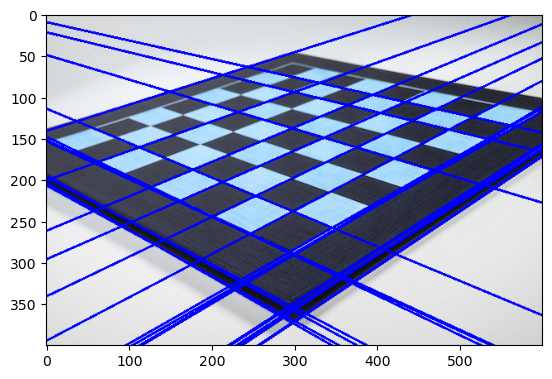

In [6]:
import cv2
import numpy as np

# Load image
image = cv2.imread('chess02_small.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 200)

# Plot edges
plt.imshow(edges, cmap='gray')


# Hough algorithm
accumulator = []

# Parameters
theta_res = 1
theta_max = 180
theta_min = 0
theta_range = theta_max - theta_min
theta = np.linspace(theta_min, theta_max, int(theta_range/theta_res))

rho_res = 1
rho_max = np.sqrt(image.shape[0]**2 + image.shape[1]**2)
rho_min = 0
rho_range = rho_max - rho_min
rho = np.linspace(rho_min, rho_max, int(rho_range/rho_res))

# Create accumulator
for i in range(len(theta)):
    accumulator.append([])
    for j in range(len(rho)):
        accumulator[i].append(0)

# Find non-zero pixels
non_zero = np.nonzero(edges)

# Accumulator
for i in range(len(non_zero[0])):
    for j in range(len(theta)):
        rho_val = non_zero[1][i]*np.cos(np.deg2rad(theta[j])) + non_zero[0][i]*np.sin(np.deg2rad(theta[j]))
        rho_val = int(np.round(rho_val))
        accumulator[j][rho_val] += 1

# Find peaks
peaks = []
for i in range(len(accumulator)):
    for j in range(len(accumulator[i])):
        if accumulator[i][j] > 150:
            peaks.append((i, j))
            
# Draw lines
for peak in peaks:
    theta_val = theta[peak[0]]
    rho_val = rho[peak[1]]
    a = np.cos(np.deg2rad(theta_val))
    b = np.sin(np.deg2rad(theta_val))
    x0 = a*rho_val
    y0 = b*rho_val
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show image
plt.imshow(image)



---
### Ejercicios

1. Extrae la línea de la imagen correspondiente con el código de barras. 
2. Umbraliza los valores de la línea anterior y visualízala.
3. Transforma el código de barras en su correspondiente código numérico.

---




## Detector de círculos de Hough

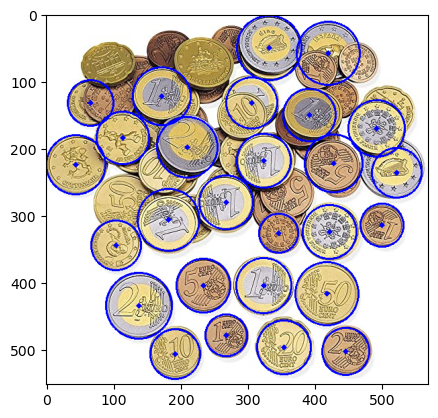

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image as gray-scale
img = cv2.imread('monedas.jpg', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# gray = cv2.resize(gray, (0,0), fx=0.25, fy=0.25)

# Apply hough transform on the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, img.shape[0]/8, param1=200, param2=60, minRadius=10, maxRadius=50)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 2)
        # Draw center
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

# Show image
plt.imshow(img)